In [7]:
import pandas as pd
import numpy as np

# loading the dataset
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

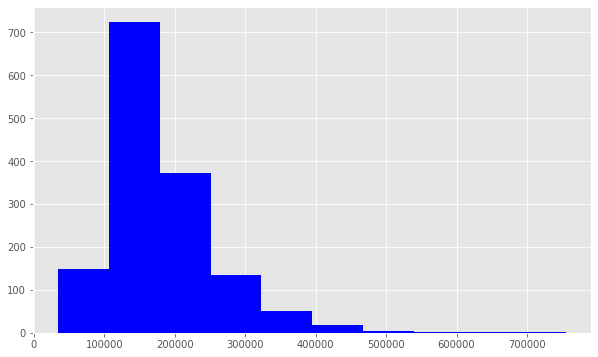

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# showing the skew
plt.hist(train_data.SalePrice, color='blue')

Text(131.28000000000003, 0.5, 'The house features in the y axis')

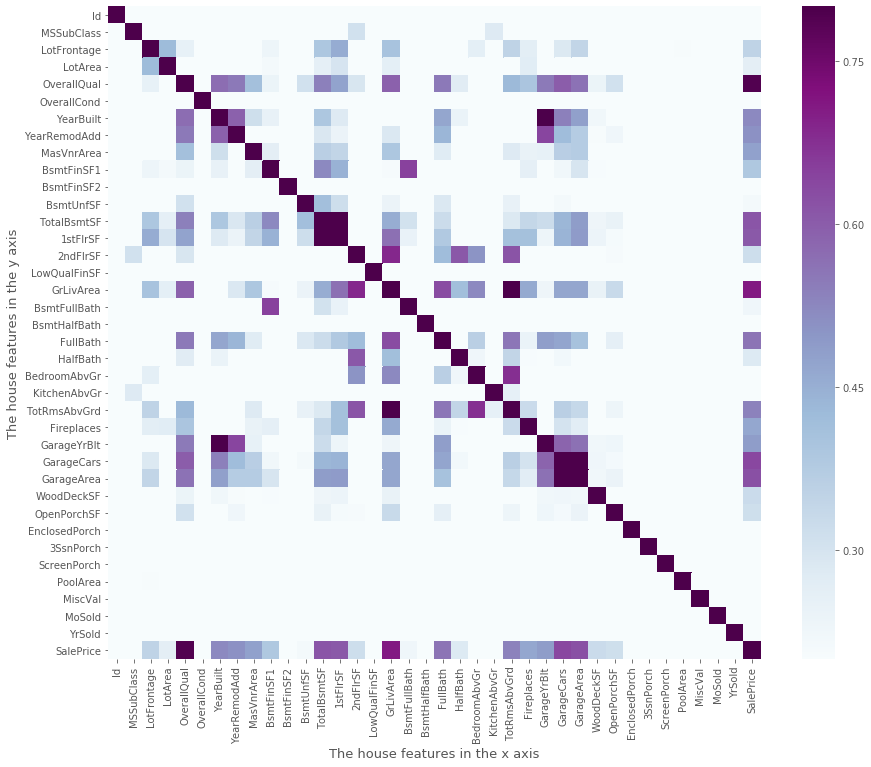

In [3]:
import seaborn as sns

# correlation matrix of features
correlation_matrix = train_data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation_matrix, vmin=0.2, vmax=0.8, square=True, cmap='BuPu')
plt.xlabel('The house features in the x axis', fontsize=13)
plt.ylabel('The house features in the y axis', fontsize=13)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

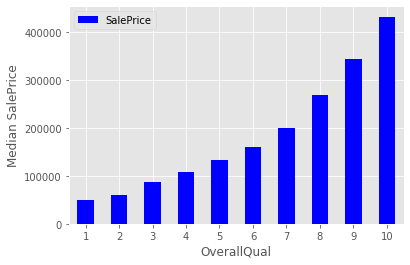

In [8]:
# OverallQual with SalePrice specifically
quality_pivot = train_data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('OverallQual')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)

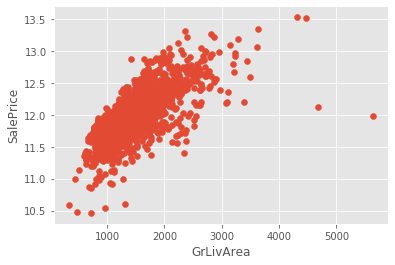

Text(0.5, 0, 'GarageArea')

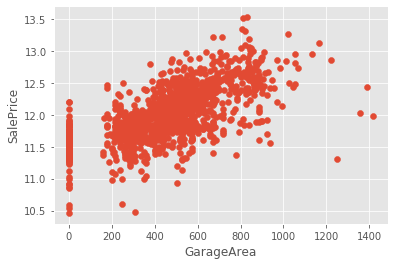

In [9]:
# finding outliers
plt.scatter(x=train_data['GrLivArea'], y=np.log(train_data.SalePrice))
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()
plt.scatter(x=train_data['GarageArea'], y=np.log(train_data.SalePrice))
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

In [10]:
# removing outliers
train_data = train_data[train_data['GrLivArea'] < 4500]
train_data = train_data[train_data['GarageArea'] < 1200]

In [12]:
# combining data for feature engineering
train_count = train_data.shape[0]
all_data = pd.concat(objs=[train_data, test_data], axis=0, sort=True)

# dropping redundant features
all_data.drop(['GarageYrBlt'], axis=1, inplace=True)
all_data.drop(['GarageCars'], axis=1, inplace=True)
all_data.drop(['Utilities'], axis=1, inplace=True)
all_data.drop(['Street'], axis=1, inplace=True)
all_data.drop(['Id'], axis=1, inplace=True)

# missing values
print(all_data.columns[all_data.isna().any()].tolist())

['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF']


In [13]:
# filling missing values
all_data['Alley'] = all_data['Alley'].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['PoolQC'] = all_data['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
# change to categorical
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

print(all_data.dtypes)

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


In [15]:
from sklearn.preprocessing import LabelEncoder

# encoding
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond',
        'HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Fence', 'BsmtExposure', 'GarageFinish',
        'LandSlope', 'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'YrSold', 'MoSold', 'Alley')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data = pd.get_dummies(all_data)

In [16]:
# splitting the data
train_data, test_data = all_data[:train_count], all_data[train_count:].drop(['SalePrice'], axis=1)

# writing the preprocessed data
train_data.to_csv('preprocessed_train.csv', index=False)
test_data.to_csv('preprocessed_test.csv', index=False)